In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def dates2num(dates_in):
    dates_out = []
    for period in dates_in:
        year = float(period.split('/')[1])
        month = float(period.split('/')[0])
        dates_out.append(year+month/12)
    return np.asarray(dates_out)

In [2]:
NHSdata = np.load('AnE_Data/NHSwaiting.npy', allow_pickle=True)
names = NHSdata[0]
dates = dates2num(NHSdata[1])
attendance = NHSdata[2]
waiting = NHSdata[3]

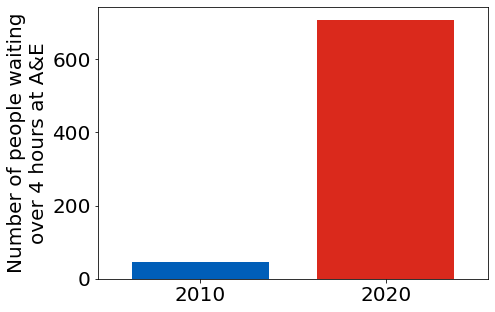

660101


In [3]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rc('font', size=20)

fig, ax1 = plt.subplots(figsize = (7,5))
time = np.arange(2010.25, 2020, 0.25)[::-1]

hospital = 0 

allBeds = waiting[hospital,:][waiting[hospital,:]!='-']

ax1.bar([time[-1], time[0]], [allBeds[-1]*1e-3, allBeds[0]*1e-3], 
        width = 7, alpha=1,tick_label = [2010, 2020], color = ['#005EB8', '#DA291C'])
ax1.set_xlim(2005, 2025)

ax1.set_ylabel("Number of people waiting\nover 4 hours at A&E")
plt.show()
print(allBeds[0]-allBeds[-1])

In [4]:
waiting = NHSdata[3]


change = np.asarray(["-"]*len(waiting), dtype = "object")

for i, waiting_i in enumerate(waiting):
    if waiting_i[0] != "-" and waiting_i[1] != "-":
        change[i] = waiting_i[0] - waiting_i[1]
        
top_five_changes = np.sort(change[change != "-"])[::-1][1:6]

top_five_names = []

for i, item in enumerate(top_five_changes):
    new_name = names[change == item][0]
    top_five_names.append(new_name)
    print(i+1, new_name)


1 Manchester University NHS Foundation Trust
2 Lewisham And Greenwich NHS Trust
3 Mid And South Essex NHS Foundation Trust
4 London North West University Healthcare NHS Trust
5 King's College Hospital NHS Foundation Trust


In [5]:
def makeURL(name):
    url_prefix = '-'.join(name.lower().split(' '))
    url = ''.join(["hospitals/",url_prefix,".html"])
    url = url.replace(',', '') 
    return url

In [6]:
for i,name in enumerate(top_five_names):
    url = "www.howsmynhs.co.uk/" + makeURL(name)
    tweet = '''
    # {}: {}
    
    {} more people waiting over four hours at A&E compared to last month.
    
    {}
    '''.format(i+1, name, change[names == name][0], url)
    print(tweet)


    # 1: Manchester University NHS Foundation Trust
    
    2882 more people waiting over four hours at A&E compared to last month.
    
    www.howsmynhs.co.uk/hospitals/manchester-university-nhs-foundation-trust.html
    

    # 2: Lewisham And Greenwich NHS Trust
    
    2242 more people waiting over four hours at A&E compared to last month.
    
    www.howsmynhs.co.uk/hospitals/lewisham-and-greenwich-nhs-trust.html
    

    # 3: Mid And South Essex NHS Foundation Trust
    
    2028 more people waiting over four hours at A&E compared to last month.
    
    www.howsmynhs.co.uk/hospitals/mid-and-south-essex-nhs-foundation-trust.html
    

    # 4: London North West University Healthcare NHS Trust
    
    1850 more people waiting over four hours at A&E compared to last month.
    
    www.howsmynhs.co.uk/hospitals/london-north-west-university-healthcare-nhs-trust.html
    

    # 5: King's College Hospital NHS Foundation Trust
    
    1784 more people waiting over four hours a

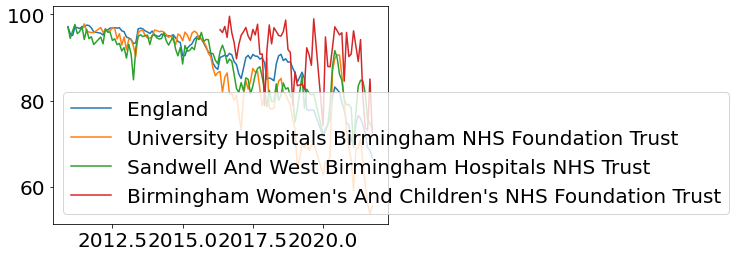

In [7]:
birminghamNames = [
    "England",
    "University Hospitals Birmingham NHS Foundation Trust",
    "Sandwell And West Birmingham Hospitals NHS Trust",
    "Birmingham Women's And Children's NHS Foundation Trust"
]

for name in birminghamNames:
    mask = names == name
    wait_i = waiting[mask][0]
    att_i = attendance[mask][0]
    
    mask2 = (wait_i != "-")*(att_i != "-")
    perc = (att_i[mask2] - wait_i[mask2])/att_i[mask2]*100
    plt.plot(dates[mask2], perc, label = name)
    
plt.legend(loc = 3)

England : 67 %
University Hospitals Birmingham : 56 %
Sandwell And West Birmingham : 74 %
Birmingham Women's And Children's : 73 %


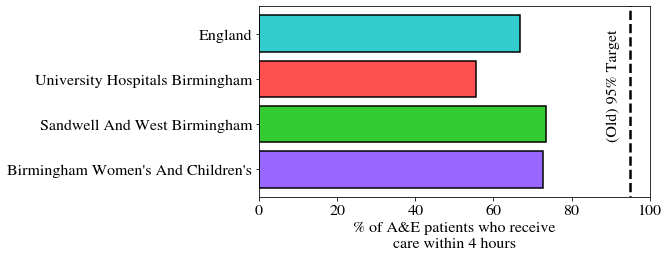

In [15]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('font', size=16)

percentages = []

birminghamPlotNames = [
    "England",
    "University Hospitals Birmingham",
    "Sandwell And West Birmingham",
    "Birmingham Women's And Children's"
]

colors = [
    "#33cccc",
    "#ff5050",
    "#33cc33",
    "#9966ff"
]

for i, name in enumerate(birminghamNames):
    mask = names == name
    wait_i = waiting[mask][0]
    att_i = attendance[mask][0]
    
    mask2 = (wait_i != "-")*(att_i != "-")
    perc = (att_i[mask2] - wait_i[mask2])/att_i[mask2]*100
    percentages.append(perc[0])
    print(birminghamPlotNames[i],":", int(np.round(perc[0])), "%")
    
plt.figure(figsize = (7, 3.5))
plt.barh(birminghamPlotNames[::-1], percentages[::-1], lw = 1.5, ec = "k", color = colors[::-1])
plt.plot([95, 95], [-2, 4], "k--", lw = 2.5)
plt.ylim(-0.6, 3.6)
plt.xlabel("% of A&E patients who receive\ncare within 4 hours");
plt.annotate("(Old) 95% Target", (89, 0.7), size = 16, rotation = 90);
plt.xlim(0, 100)
plt.savefig("../../../BirminghamAnE.pdf", bbox_inches = "tight")